<a href="https://colab.research.google.com/github/JapiKredi/Multmodel_RAG_System_for_video_processing/blob/main/Multmodel_RAG_System_for_video_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. llamaindex framework
2. Lancedb
3. LLM model(GPT-4V)
4. GEMINI-PRO-VISION

Steps:
1. Download video from YouTube, process and store it.

2. Build Multi-Modal index and vector store for both texts and images.

3. Retrieve relevant images and context, use both to augment the prompt.

4. Using GPT4V for reasoning the correlations between the input query and augmented data and generating final response.

In [2]:
%pip install llama-index-vector-stores-lancedb
%pip install llama-index-multi-modal-llms-openai

In [7]:
%pip install llama-index-embeddings-clip
!pip install speech_recognition
!pip install SpeechRecognition
!pip install pytube

ERROR: Could not find a version that satisfies the requirement speech_recognition (from versions: none)
ERROR: No matching distribution found for speech_recognition
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.3 MB/s eta 0:00:00


In [1]:
%pip install llama_index ftfy regex tqdm
%pip install -U openai-whisper
%pip install git+https://github.com/openai/CLIP.git
%pip install torch torchvision
%pip install matplotlib scikit-image
%pip install lancedb
%pip install moviepy
%pip install pytube
%pip install pydub
%pip install SpeechRecognition
%pip install ffmpeg-python
%pip install soundfile

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-p3gw0k59
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-p3gw0k59
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done


In [2]:
from moviepy.editor import VideoFileClip
from pathlib import Path
import speech_recognition as sr
from pytube import YouTube
from pprint import pprint

In [3]:
from google.colab import userdata
OPENAI_API_TOKEN=userdata.get('OPENAI_API_KEY')

In [4]:
import os
os.environ["OPENAI_API_KEY"] = OPENAI_API_TOKEN

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

In [6]:
import os
os.getcwd()

'/content'

In [7]:
video_url="https://youtu.be/3dhcmeOTZ_Q"
output_video_path = "/content/video_data/"
output_folder = "/content/mixed_data/"
output_audio_path = "/content/mixed_data/output_audio.wav"

In [8]:
filepath=output_video_path + "input_vid.mp4"

In [9]:
filepath

'/content/video_data/input_vid.mp4'

In [10]:
#filepath = output_video_path + "input_vid.mp4"
#Path(output_folder).mkdir(parents=True, exist_ok=True)

In [11]:
#Path(filepath).mkdir(parents=True,exist_ok=True)

In [12]:
import matplotlib.pyplot as plt

In [13]:
def plot_images(images_path):
  images_shown = 0
  plt.figure(figsize=(16, 9))
  for img_path in images_path:
        if os.path.isfile(img_path):
            image = Image.open(img_path)

            plt.subplot(2, 3, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            images_shown += 1
            if images_shown >= 5:
                break

In [14]:
from pytube import YouTube
def download_video(url,output_path):
  yt = YouTube(url)
  metadata = {"Author": yt.author, "Title": yt.title, "Views": yt.views}
  yt.streams.get_highest_resolution().download(
        output_path=output_path, filename="input_vid.mp4"
    )
  return metadata

In [15]:
from moviepy.editor import VideoFileClip
def video_to_images(video_path,output_flder):
  clip=VideoFileClip(video_path)
  clip.write_images_sequence(
      os.path.join(output_folder,"frame%04d.png"),fps=0.2
  )

In [16]:
def video_to_audio(video_path,output_audio_path):
  clip=VideoFileClip(video_path)
  audio=clip.audio
  audio.write_audiofile(output_audio_path)

In [17]:
def audio_to_text(audio_path):
  recognizer=sr.Recognizer()
  audio=sr.AudioFile(audio_path)

  with audio as source:
    audio_data=recognizer.record(source)

    try:

      #recognize the speech
      text = recognizer.recognize_whisper(audio_data)

    except sr.UnknownValueError:
      print("Speech recognition could not understand the audio.")
  return text

In [18]:
video_url

'https://youtu.be/3dhcmeOTZ_Q'

In [19]:
output_video_path

'/content/video_data/'

In [20]:
metadata_vid = download_video(video_url, output_video_path)

In [21]:
metadata_vid

{'Author': '3-Minute Data Science',
 'Title': 'Linear Regression in 3 Minutes',
 'Views': 7234}

In [22]:
filepath

'/content/video_data/input_vid.mp4'

In [23]:
output_folder

'/content/mixed_data/'

In [24]:
!mkdir mixed_data

In [25]:
filepath

'/content/video_data/input_vid.mp4'

In [26]:
output_folder

'/content/mixed_data/'

In [27]:
video_to_images(filepath,output_folder)

Moviepy - Writing frames /content/mixed_data/frame%04d.png.


Moviepy - Done writing frames /content/mixed_data/frame%04d.png.


In [28]:
filepath

'/content/video_data/input_vid.mp4'

In [29]:
output_audio_path

'/content/mixed_data/output_audio.wav'

In [30]:
video_to_audio(filepath,output_audio_path)

MoviePy - Writing audio in /content/mixed_data/output_audio.wav


MoviePy - Done.


In [31]:
output_audio_path

'/content/mixed_data/output_audio.wav'

In [32]:
text_data=audio_to_text(output_audio_path)

100%|████████████████████████████████████████| 139M/139M [00:01<00:00, 130MiB/s]


In [33]:
text_data

" Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some data points as shown here, so you can make predictions on unknown data, assuming there is a linear relationship between the variables. You might be familiar with the linear function y equals mx plus b, where y is the output variable, also called the dependent variable. You may also see expressed as f of x, the function of the input variable. x on the other hand, would serve as the input variable, also called the independent variable. It's likely you'll see the coefficients m and b expressed as beta 1 and beta 0 respectively. So what do the m and b coefficients do? The m or beta 1 coefficient controls the slope of the line. The b or the beta 0 controls the intercept of the line. In machine learning, we also know it as the bias. These two coefficients are what we are solving for in linear re

In [34]:
with open(output_folder + "output_text.txt", "w") as file:
        file.write(text_data)
print("Text data saved to file")
file.close()

Text data saved to file


In [35]:
os.remove(output_audio_path)
print("Audio file removed")

Audio file removed


In [ ]:
# embedding lance db
# llm

In [36]:
!pip install llama-index-readers-file

In [37]:
from llama_index.core.indices import MultiModalVectorStoreIndex
from llama_index.core import SimpleDirectoryReader
from llama_index.core import StorageContext

In [38]:
from llama_index.vector_stores.lancedb import LanceDBVectorStore

In [39]:
text_store=LanceDBVectorStore(uri="lancedb",table_name="text_collection")
image_store=LanceDBVectorStore(uri="lancedb",table_name="image_collection")

In [40]:
storage_context=StorageContext.from_defaults(vector_store=text_store,image_store=image_store)

In [41]:
output_folder

'/content/mixed_data/'

In [42]:
documents=SimpleDirectoryReader(output_folder).load_data()

In [43]:
documents

[ImageDocument(id_='a887bd70-b4e9-484c-9ffb-5d30f1f362ed', embedding=None, metadata={'file_path': '/content/mixed_data/frame0000.png', 'file_name': 'frame0000.png', 'file_type': 'image/png', 'file_size': 2759, 'creation_date': '2024-04-20', 'last_modified_date': '2024-04-20'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, text='', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n', image=None, image_path='/content/mixed_data/frame0000.png', image_url=None, image_mimetype=None, text_embedding=None),
 ImageDocument(id_='11af7196-7f35-4fbf-ab7e-2382027135a9', embedding=None, metadata={'file_path': '/content/mixed_data/frame0001.png', 'file_name': 'frame0001.png', 'file

In [44]:
index = MultiModalVectorStoreIndex.from_documents(documents,storage_context=storage_context)

100%|███████████████████████████████████████| 338M/338M [00:06<00:00, 51.4MiB/s]


In [45]:
retriever_engine=index.as_retriever(imilarity_top_k=5, image_similarity_top_k=5)

# RAG

In [46]:
import json
metadata_str=json.dumps(metadata_vid)

In [47]:
qa_tmpl_str=(
    "Given the provided information, including relevant images and retrieved context from the video, \
    accurately and precisely answer the query without any additional prior knowledge.\n"

    "---------------------\n"
    "Context: {context_str}\n"
    "Metadata for video: {metadata_str} \n"

    "---------------------\n"
    "Query: {query_str}\n"
    "Answer: "
)

In [48]:
qa_tmpl_str2=(
    "Given the provided information, including relevant images and retrieved context from the video, \
    accurately and precisely answer the query without any additional prior knowledge.\n"

    "---------------------\n"
    "Metadata for video: {metadata_str} \n"

    "---------------------\n"
    "Query: {query_str}\n"
    "Answer: "
)

In [49]:
from llama_index.core.response.notebook_utils import display_source_node
from llama_index.core.schema import ImageNode

In [50]:
query_str="what is a O'Reilly platform.?"

In [51]:
retrieval_results=retriever_engine.retrieve(query_str)

In [52]:
retrieval_results

[NodeWithScore(node=TextNode(id_='5a5080c1-4a08-4d6b-9a1c-3b96a9b47751', embedding=[-0.011831889860332012, 0.0038376476150006056, -0.001850233180448413, -0.011338036507368088, -0.010082827880978584, 0.0011677560396492481, 0.0016093084122985601, 0.00849838275462389, -0.03259428218007088, -0.042553648352622986, -0.006865925621241331, 0.025419699028134346, -0.001395819941535592, 0.02853371575474739, 0.007867349311709404, -0.016804711893200874, 0.02399301342666149, 0.010727579705417156, 0.0436236634850502, -0.020138218998908997, -0.030728617683053017, 0.012943058274686337, -0.013231138698756695, -0.01629714109003544, -0.014417757280170918, -0.019520903006196022, 0.030344508588314056, -0.019685519859194756, 0.006968811620026827, -0.0025601466186344624, 0.012744145467877388, -0.006931086536496878, -0.009931928478181362, -0.019891291856765747, -0.010508089326322079, -0.02037142775952816, 0.011777017265558243, -0.001055438886396587, 0.023869551718235016, -0.01819024421274662, 0.021263105794787

In [53]:
retrieved_image=[]
retrieved_text=[]

In [54]:
for res_node in retrieval_results:
  if isinstance(res_node.node,ImageNode):
    retrieved_image.append(res_node.node.metadata["file_path"])
  else:
     display_source_node(res_node, source_length=200)
     retrieved_text.append(res_node.text)

**Node ID:** 5a5080c1-4a08-4d6b-9a1c-3b96a9b47751<br>**Similarity:** 0.5568584203720093<br>**Text:** Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some...<br>

In [55]:
retrieved_image

['/content/mixed_data/frame0040.png',
 '/content/mixed_data/frame0044.png',
 '/content/mixed_data/frame0042.png',
 '/content/mixed_data/frame0045.png',
 '/content/mixed_data/frame0041.png']

In [56]:
retrieved_text

["Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some data points as shown here, so you can make predictions on unknown data, assuming there is a linear relationship between the variables. You might be familiar with the linear function y equals mx plus b, where y is the output variable, also called the dependent variable. You may also see expressed as f of x, the function of the input variable. x on the other hand, would serve as the input variable, also called the independent variable. It's likely you'll see the coefficients m and b expressed as beta 1 and beta 0 respectively. So what do the m and b coefficients do? The m or beta 1 coefficient controls the slope of the line. The b or the beta 0 controls the intercept of the line. In machine learning, we also know it as the bias. These two coefficients are what we are solving for in linear re

In [57]:
def retrieve(retriever_engine, query_str):
    retrieval_results = retriever_engine.retrieve(query_str)

    retrieved_image = []
    retrieved_text = []
    for res_node in retrieval_results:
        if isinstance(res_node.node, ImageNode):
            retrieved_image.append(res_node.node.metadata["file_path"])
        else:
            display_source_node(res_node, source_length=200)
            retrieved_text.append(res_node.text)

    return retrieved_image, retrieved_text

In [58]:
img, txt = retrieve(retriever_engine=retriever_engine, query_str=query_str)

**Node ID:** 5a5080c1-4a08-4d6b-9a1c-3b96a9b47751<br>**Similarity:** 0.5568584203720093<br>**Text:** Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some...<br>

In [59]:
output_folder

'/content/mixed_data/'

In [60]:
img

['/content/mixed_data/frame0040.png',
 '/content/mixed_data/frame0044.png',
 '/content/mixed_data/frame0042.png',
 '/content/mixed_data/frame0045.png',
 '/content/mixed_data/frame0041.png']

In [61]:
image_documents = SimpleDirectoryReader(input_dir=output_folder, input_files=img).load_data()

In [62]:
image_documents2 = SimpleDirectoryReader(input_files=img).load_data()

In [63]:
context_str = "".join(txt)

In [64]:
context_str

"Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some data points as shown here, so you can make predictions on unknown data, assuming there is a linear relationship between the variables. You might be familiar with the linear function y equals mx plus b, where y is the output variable, also called the dependent variable. You may also see expressed as f of x, the function of the input variable. x on the other hand, would serve as the input variable, also called the independent variable. It's likely you'll see the coefficients m and b expressed as beta 1 and beta 0 respectively. So what do the m and b coefficients do? The m or beta 1 coefficient controls the slope of the line. The b or the beta 0 controls the intercept of the line. In machine learning, we also know it as the bias. These two coefficients are what we are solving for in linear reg

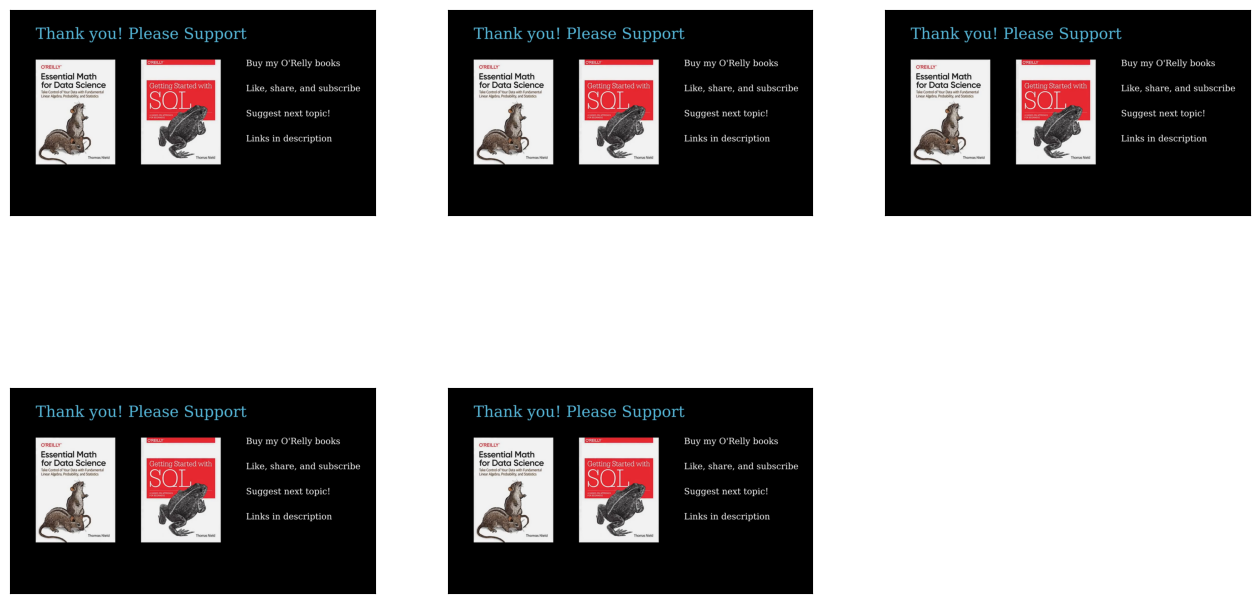

In [65]:
plot_images(img)

In [66]:
qa_tmpl_str2

'Given the provided information, including relevant images and retrieved context from the video,     accurately and precisely answer the query without any additional prior knowledge.\n---------------------\nMetadata for video: {metadata_str} \n---------------------\nQuery: {query_str}\nAnswer: '

In [67]:
from llama_index.multi_modal_llms.openai import OpenAIMultiModal

In [68]:
openai_mm_llm = OpenAIMultiModal(model="gpt-4-vision-preview", api_key=OPENAI_API_TOKEN, max_new_tokens=1500)

In [69]:
result=openai_mm_llm.complete(
    prompt=qa_tmpl_str2.format(
        query_str=query_str,metadata_str=metadata_str
    ),
    image_documents=image_documents2,
)

In [70]:
pprint(result.text)

("The O'Reilly platform refers to O'Reilly Media, a learning company that "
 'publishes books, produces tech conferences, and provides an online learning '
 'platform with a focus on new technologies and professional development. The '
 "image you provided shows books published by O'Reilly Media, which is known "
 'for its distinctive cover designs featuring various animals.')


In [71]:
result2=openai_mm_llm.complete(
    prompt="what is O'Reilly?",
    image_documents=image_documents2
)
print(result2.text)

O'Reilly is a learning company that offers a variety of educational resources, including books, conferences, and online courses, primarily focused on technology and business topics. O'Reilly is well-known for publishing books with distinctive cover designs featuring various animals. The books shown in the image, "The Essential Math for Data Science" and "Getting Started with SQL," are examples of O'Reilly's educational materials aimed at professionals and students who want to learn more about these specific subjects. The image appears to be a slide from a presentation encouraging viewers to support the speaker or author by purchasing their books and engaging with their content online.


In [72]:
result3=openai_mm_llm.complete(
    prompt="just tell me what you are seeing over the pecific ocean?",
    image_documents=image_documents2
)
pprint(result3.text)

#real time system

#sattalites

#just tell me what you are seeing over the pecific ocean?

("Sorry, I can't provide real-time or current information about specific "
 'locations such as the Pacific Ocean. However, I can show you an image that '
 'you\'ve uploaded. The image appears to be a slide or graphic with a "Thank '
 'You! Please Support" message. It features images of two O\'Reilly book '
 'covers: "Essential Math for Data Science" and "Getting Started with SQL," '
 'both by Thomas Nield. The slide also includes a call to action to buy the '
 'books, like, share, and subscribe, and suggests that viewers can suggest the '
 'next topic or find links in the description. This seems to be a closing '
 'slide from a presentation or a video, typically used by content creators to '
 'engage with their audience.')
